# Predicting Steps using personal Samsung Health data and Weather Data from TUDelft

With my research I want to predict how many steps I will make on different in terms of weather days. Basically I would like to know if weather have influence on the steps that I take daily and try to predict how many steps I will make throughout the day. This can be later on translated direclty into calories (high correlation between steps and calories burned) and for example help me estimate how many calories I will burn throughout the week and help me adjust my diet to balance fat burn and limit muscle loss while (currently) loosing weight. 

## Data set: I will use my personal steps data from samsung health app and weather data measurements by the Royal Netherlands Meteorological Institute (KNMI) from TUDelft website

## Part 1: Data cleaning, Feature engineering

In [57]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #We need this to split the data

In [58]:
steps = pd.read_csv('pedometer.csv') #loading steps dataset
steps

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time
0,586,f42d0750-de9b-419a-8db3-49d78d17a660.binning_data.json,349266,6000,0,41:53.1,com.sec.android.app.shealth,26/04/2022,f42d0750-de9b-419a-8db3-49d78d17a660.source_info.json,1.251768,437.2000,21.619999,586,VfS0qUERdZ,com.sec.android.app.shealth,0,f42d0750-de9b-419a-8db3-49d78d17a660.achievement.json,f42d0750-de9b-419a-8db3-49d78d17a660,1.650930e+12
1,586,02adc427-1752-49c2-a018-b7dfd5db476b.binning_data.json,349266,6000,0,00:00.6,com.sec.android.app.shealth,26/04/2022,NaN,1.251768,437.2000,21.619999,586,ol6Sqk8vrC,com.sec.android.app.shealth,0,02adc427-1752-49c2-a018-b7dfd5db476b.achievement.json,02adc427-1752-49c2-a018-b7dfd5db476b,1.650930e+12
2,1859,215999c1-441d-4443-81c1-270dcdd17284.binning_data.json,1086519,6000,2,49:42.5,com.sec.android.app.shealth,27/04/2022,215999c1-441d-4443-81c1-270dcdd17284.source_info.json,1.286935,1398.2800,66.399994,1857,VfS0qUERdZ,com.sec.android.app.shealth,0,215999c1-441d-4443-81c1-270dcdd17284.achievement.json,215999c1-441d-4443-81c1-270dcdd17284,1.651020e+12
3,1859,65c21c09-0ec2-4f37-a9ef-a7d0f32c2fff.binning_data.json,1086519,6000,2,00:01.0,com.sec.android.app.shealth,27/04/2022,NaN,1.286935,1398.2800,66.399994,1857,ol6Sqk8vrC,com.sec.android.app.shealth,0,65c21c09-0ec2-4f37-a9ef-a7d0f32c2fff.achievement.json,65c21c09-0ec2-4f37-a9ef-a7d0f32c2fff,1.651020e+12
4,1210,a2e43944-c5bc-4d9d-b8fb-ee1135239589.binning_data.json,708448,6000,0,00:01.0,com.sec.android.app.shealth,29/04/2022,NaN,1.282183,908.3600,43.730000,1210,ol6Sqk8vrC,com.sec.android.app.shealth,0,a2e43944-c5bc-4d9d-b8fb-ee1135239589.achievement.json,a2e43944-c5bc-4d9d-b8fb-ee1135239589,1.651190e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,6453,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.binning_data.json,3770821,6000,2,08:38.6,com.sec.android.app.shealth,17/06/2022,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.source_info.json,1.283604,4840.2400,250.290000,6451,VfS0qUERdZ,com.sec.android.app.shealth,0,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.achievement.json,cfddaf19-bd2c-470d-ab9f-1a89b93f0750,1.655510e+12
121,2711,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.binning_data.json,1594519,6000,27,15:01.4,com.sec.android.app.shealth,25/06/2022,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.source_info.json,1.279821,2040.7000,100.950000,2684,VfS0qUERdZ,com.sec.android.app.shealth,0,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.achievement.json,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1,1.656120e+12
122,773,c24f6c31-1442-4a59-94ac-c8e8a79a8821.binning_data.json,462255,6000,0,23:04.4,com.sec.android.app.shealth,21/06/2022,c24f6c31-1442-4a59-94ac-c8e8a79a8821.source_info.json,1.248097,576.9400,28.470000,773,VfS0qUERdZ,com.sec.android.app.shealth,0,c24f6c31-1442-4a59-94ac-c8e8a79a8821.achievement.json,c24f6c31-1442-4a59-94ac-c8e8a79a8821,1.655770e+12
123,4558,fb96609a-8024-442b-a6b3-1468687da06e.binning_data.json,2598226,6000,77,41:00.8,com.sec.android.app.shealth,24/06/2022,fb96609a-8024-442b-a6b3-1468687da06e.source_info.json,1.326551,3446.6800,173.390000,4481,VfS0qUERdZ,com.sec.android.app.shealth,0,fb96609a-8024-442b-a6b3-1468687da06e.achievement.json,fb96609a-8024-442b-a6b3-1468687da06e,1.656030e+12


In [59]:
steps.dropna(subset = ["source_info"], inplace=True) #getting rid of doubled rows with the same data, by eliminating (not needed) variable that only one of doubled rows had
steps

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time
0,586,f42d0750-de9b-419a-8db3-49d78d17a660.binning_data.json,349266,6000,0,41:53.1,com.sec.android.app.shealth,26/04/2022,f42d0750-de9b-419a-8db3-49d78d17a660.source_info.json,1.251768,437.2000,21.619999,586,VfS0qUERdZ,com.sec.android.app.shealth,0,f42d0750-de9b-419a-8db3-49d78d17a660.achievement.json,f42d0750-de9b-419a-8db3-49d78d17a660,1.650930e+12
2,1859,215999c1-441d-4443-81c1-270dcdd17284.binning_data.json,1086519,6000,2,49:42.5,com.sec.android.app.shealth,27/04/2022,215999c1-441d-4443-81c1-270dcdd17284.source_info.json,1.286935,1398.2800,66.399994,1857,VfS0qUERdZ,com.sec.android.app.shealth,0,215999c1-441d-4443-81c1-270dcdd17284.achievement.json,215999c1-441d-4443-81c1-270dcdd17284,1.651020e+12
5,1210,36797971-370f-4f0c-a7e7-76b5d517c612.binning_data.json,708448,6000,0,41:16.0,com.sec.android.app.shealth,29/04/2022,36797971-370f-4f0c-a7e7-76b5d517c612.source_info.json,1.282183,908.3600,43.730000,1210,VfS0qUERdZ,com.sec.android.app.shealth,0,36797971-370f-4f0c-a7e7-76b5d517c612.achievement.json,36797971-370f-4f0c-a7e7-76b5d517c612,1.651190e+12
7,860,ae5411ef-e182-4c07-81f0-8118c976761d.binning_data.json,519282,6000,0,04:32.8,com.sec.android.app.shealth,30/04/2022,ae5411ef-e182-4c07-81f0-8118c976761d.source_info.json,1.237881,642.8100,31.800000,860,VfS0qUERdZ,com.sec.android.app.shealth,0,ae5411ef-e182-4c07-81f0-8118c976761d.achievement.json,ae5411ef-e182-4c07-81f0-8118c976761d,1.651280e+12
8,1865,48f5b612-9ded-4785-af09-582dba360632.binning_data.json,1046883,6000,5,40:52.3,com.sec.android.app.shealth,28/04/2022,48f5b612-9ded-4785-af09-582dba360632.source_info.json,1.346884,1410.0300,67.250000,1860,VfS0qUERdZ,com.sec.android.app.shealth,0,48f5b612-9ded-4785-af09-582dba360632.achievement.json,48f5b612-9ded-4785-af09-582dba360632,1.651100e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,6453,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.binning_data.json,3770821,6000,2,08:38.6,com.sec.android.app.shealth,17/06/2022,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.source_info.json,1.283604,4840.2400,250.290000,6451,VfS0qUERdZ,com.sec.android.app.shealth,0,cfddaf19-bd2c-470d-ab9f-1a89b93f0750.achievement.json,cfddaf19-bd2c-470d-ab9f-1a89b93f0750,1.655510e+12
121,2711,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.binning_data.json,1594519,6000,27,15:01.4,com.sec.android.app.shealth,25/06/2022,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.source_info.json,1.279821,2040.7000,100.950000,2684,VfS0qUERdZ,com.sec.android.app.shealth,0,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1.achievement.json,8bfeb750-6b5a-44bd-9262-2235b9fc0cc1,1.656120e+12
122,773,c24f6c31-1442-4a59-94ac-c8e8a79a8821.binning_data.json,462255,6000,0,23:04.4,com.sec.android.app.shealth,21/06/2022,c24f6c31-1442-4a59-94ac-c8e8a79a8821.source_info.json,1.248097,576.9400,28.470000,773,VfS0qUERdZ,com.sec.android.app.shealth,0,c24f6c31-1442-4a59-94ac-c8e8a79a8821.achievement.json,c24f6c31-1442-4a59-94ac-c8e8a79a8821,1.655770e+12
123,4558,fb96609a-8024-442b-a6b3-1468687da06e.binning_data.json,2598226,6000,77,41:00.8,com.sec.android.app.shealth,24/06/2022,fb96609a-8024-442b-a6b3-1468687da06e.source_info.json,1.326551,3446.6800,173.390000,4481,VfS0qUERdZ,com.sec.android.app.shealth,0,fb96609a-8024-442b-a6b3-1468687da06e.achievement.json,fb96609a-8024-442b-a6b3-1468687da06e,1.656030e+12


In [60]:
steps2 = steps.drop(['binning_data', 'active_time', 'recommendation', 'run_step_count', 'update_time', 'source_package_name', 'source_info', 'deviceuuid', 'pkg_name', 'healthy_step', 'achievement', 'datauuid', 'day_time'], axis=1, inplace=False)#keeping only needed columns

In [61]:
steps2

,step_count,create_time,speed,distance,calorie,walk_step_count
0,586,26/04/2022,1.251768,437.2000,21.619999,586
2,1859,27/04/2022,1.286935,1398.2800,66.399994,1857
5,1210,29/04/2022,1.282183,908.3600,43.730000,1210
7,860,30/04/2022,1.237881,642.8100,31.800000,860
8,1865,28/04/2022,1.346884,1410.0300,67.250000,1860
...,...,...,...,...,...,...
120,6453,17/06/2022,1.283604,4840.2400,250.290000,6451
121,2711,25/06/2022,1.279821,2040.7000,100.950000,2684
122,773,21/06/2022,1.248097,576.9400,28.470000,773
123,4558,24/06/2022,1.326551,3446.6800,173.390000,4481


In [62]:
steps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 124
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   step_count       63 non-null     int64  
 1   create_time      63 non-null     object 
 2   speed            63 non-null     float64
 3   distance         63 non-null     float64
 4   calorie          63 non-null     float64
 5   walk_step_count  63 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 3.4+ KB


In [63]:
steps2['create_time'] = pd.to_datetime(steps2['create_time'], dayfirst=True, utc=True) #Changing Formatted Date from String to Datetime
steps2['create_time'][0]

Timestamp('2022-04-26 00:00:00+0000', tz='UTC')

In [64]:
steps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 124
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   step_count       63 non-null     int64              
 1   create_time      63 non-null     datetime64[ns, UTC]
 2   speed            63 non-null     float64            
 3   distance         63 non-null     float64            
 4   calorie          63 non-null     float64            
 5   walk_step_count  63 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(2)
memory usage: 5.5 KB


In [65]:
weather=pd.read_csv('weather.csv') #loading weather dataset
weather

,ID,Local,Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],Cloud [okta],Pressure [Pa],Rain [mm/hr],Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees]
0,2785,26/04/2022 00:30,0.000,8.648,6.869,2.546,3.635,101275.910,0.102,0.000,0.000,-23.388,14.749
1,2786,26/04/2022 01:30,0.000,8.502,6.656,2.886,3.938,101257.434,0.189,0.000,0.000,-19.866,29.985
2,2787,26/04/2022 02:30,0.000,8.346,6.440,2.750,4.478,101236.433,0.059,0.000,0.000,-14.300,44.101
3,2788,26/04/2022 03:30,0.000,8.271,6.264,2.700,5.354,101218.210,0.054,0.000,0.000,-7.171,57.063
4,2789,26/04/2022 04:30,6.149,8.341,6.108,2.705,5.354,101226.367,0.087,6.041,0.110,1.053,69.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,4292,27/06/2022 19:30,19.453,16.863,16.980,2.980,3.875,101498.189,0.106,16.534,3.342,2.885,305.411
1508,4293,27/06/2022 20:30,0.080,15.676,15.665,2.626,4.333,101523.545,0.015,0.072,0.000,-4.029,317.329
1509,4294,27/06/2022 21:30,0.000,15.093,14.568,2.438,4.333,101527.919,0.012,0.000,0.000,-9.484,330.064
1510,4295,27/06/2022 22:30,0.000,14.487,13.446,2.551,4.160,101526.399,0.039,0.000,0.000,-13.114,343.612


In [66]:
weather.drop(["ID", 'Irradiance [W/m^2]', 'T_ground [Degrees Celsius]', 'Cloud [okta]', 'Pressure [Pa]', 'Diffuse [W/m^2]', 'Direct [W/m^2]', 'Elevation [Degrees]', 'Azimuth [Degrees]'], axis=1, inplace=True)#keeping only needed columns

In [67]:
weather

,Local,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr]
0,26/04/2022 00:30,8.648,2.546,0.102
1,26/04/2022 01:30,8.502,2.886,0.189
2,26/04/2022 02:30,8.346,2.750,0.059
3,26/04/2022 03:30,8.271,2.700,0.054
4,26/04/2022 04:30,8.341,2.705,0.087
...,...,...,...,...
1507,27/06/2022 19:30,16.863,2.980,0.106
1508,27/06/2022 20:30,15.676,2.626,0.015
1509,27/06/2022 21:30,15.093,2.438,0.012
1510,27/06/2022 22:30,14.487,2.551,0.039


In [68]:
weather.isnull().sum() #we can see that the dataset is clean (no missing values)

Local                          0
T_ambient [Degrees Celsius]    0
Wind [m/s]                     0
Rain [mm/hr]                   0
dtype: int64

In [69]:
weather['Local'] = pd.to_datetime(weather['Local'], dayfirst=True, utc=True) #Changing Formatted Date from String to Datetime
weather['Local'][0]

Timestamp('2022-04-26 00:30:00+0000', tz='UTC')

In [70]:
weather = weather.sort_values(by='Local')
weather.head()

,Local,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr]
0,2022-04-26 00:30:00+00:00,8.648,2.546,0.102
1,2022-04-26 01:30:00+00:00,8.502,2.886,0.189
2,2022-04-26 02:30:00+00:00,8.346,2.750,0.059
3,2022-04-26 03:30:00+00:00,8.271,2.700,0.054
4,2022-04-26 04:30:00+00:00,8.341,2.705,0.087


In [71]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Local                        1512 non-null   datetime64[ns, UTC]
 1   T_ambient [Degrees Celsius]  1512 non-null   float64            
 2   Wind [m/s]                   1512 non-null   float64            
 3   Rain [mm/hr]                 1512 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 59.1 KB


In [72]:
# this DataFrame will use Formatted Date as an index just for visualization objective
data = weather.copy()
# Set 'Formatted Date' as index and resample Date
resampled_df = data.set_index('Local')
resampled_days = resampled_df.resample('D').mean()
resampled_df = resampled_df.resample('M').mean()

In [73]:
len(resampled_df),len(weather),len(resampled_days)

(3, 1512, 63)

Resample('M') simply converting the hourly data to monthly by taking the mean. But it will also drop all the "object" columns. SO what we canna do later is conacting these "object" columns with all kind of Local time cloumns in one Data Frame.

And Resample('D') does the exact same idea but it convert the time to daily data

Now after changing Local time from String to Datetime we will replace every date column with a set of date metadata columns, such as holiday, day of week, and month. These columns provide categorical data that we suspect will be useful.

fastai comes with a function that will do this for us—we just have to pass a column name that contains dates:

In [74]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Local                        1512 non-null   datetime64[ns, UTC]
 1   T_ambient [Degrees Celsius]  1512 non-null   float64            
 2   Wind [m/s]                   1512 non-null   float64            
 3   Rain [mm/hr]                 1512 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 59.1 KB


In [75]:
from fastai.tabular.all import *

In [76]:
#make a Date copy because "add_datepart" do delete the orginal formatted Date.
#In other word the function transfer the column to Date Parts
weather['Date'] = weather["Local"]
df = add_datepart(weather, 'Local')

In [77]:
df

,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],Date,LocalYear,LocalMonth,LocalWeek,LocalDay,LocalDayofweek,LocalDayofyear,LocalIs_month_end,LocalIs_month_start,LocalIs_quarter_end,LocalIs_quarter_start,LocalIs_year_end,LocalIs_year_start,LocalElapsed
0,8.648,2.546,0.102,2022-04-26 00:30:00+00:00,2022,4,17,26,1,116,False,False,False,False,False,False,1.650933e+09
1,8.502,2.886,0.189,2022-04-26 01:30:00+00:00,2022,4,17,26,1,116,False,False,False,False,False,False,1.650937e+09
2,8.346,2.750,0.059,2022-04-26 02:30:00+00:00,2022,4,17,26,1,116,False,False,False,False,False,False,1.650940e+09
3,8.271,2.700,0.054,2022-04-26 03:30:00+00:00,2022,4,17,26,1,116,False,False,False,False,False,False,1.650944e+09
4,8.341,2.705,0.087,2022-04-26 04:30:00+00:00,2022,4,17,26,1,116,False,False,False,False,False,False,1.650947e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,16.863,2.980,0.106,2022-06-27 19:30:00+00:00,2022,6,26,27,0,178,False,False,False,False,False,False,1.656358e+09
1508,15.676,2.626,0.015,2022-06-27 20:30:00+00:00,2022,6,26,27,0,178,False,False,False,False,False,False,1.656362e+09
1509,15.093,2.438,0.012,2022-06-27 21:30:00+00:00,2022,6,26,27,0,178,False,False,False,False,False,False,1.656365e+09
1510,14.487,2.551,0.039,2022-06-27 22:30:00+00:00,2022,6,26,27,0,178,False,False,False,False,False,False,1.656369e+09


In [78]:
' '.join(o for o in df.columns if o.startswith('Local')) #joining resampled additions with Local in name

'LocalYear LocalMonth LocalWeek LocalDay LocalDayofweek LocalDayofyear LocalIs_month_end LocalIs_month_start LocalIs_quarter_end LocalIs_quarter_start LocalIs_year_end LocalIs_year_start LocalElapsed'

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   T_ambient [Degrees Celsius]  1512 non-null   float64            
 1   Wind [m/s]                   1512 non-null   float64            
 2   Rain [mm/hr]                 1512 non-null   float64            
 3   Date                         1512 non-null   datetime64[ns, UTC]
 4   LocalYear                    1512 non-null   int64              
 5   LocalMonth                   1512 non-null   int64              
 6   LocalWeek                    1512 non-null   int64              
 7   LocalDay                     1512 non-null   int64              
 8   LocalDayofweek               1512 non-null   int64              
 9   LocalDayofyear               1512 non-null   int64              
 10  LocalIs_month_end            1512 non-null   boo

In [80]:
df[['LocalIs_month_end','LocalIs_month_start','LocalIs_quarter_end',
            'LocalIs_quarter_start','LocalIs_year_end','LocalIs_year_start']].head(5)

,LocalIs_month_end,LocalIs_month_start,LocalIs_quarter_end,LocalIs_quarter_start,LocalIs_year_end,LocalIs_year_start
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [81]:
bool_list = ['LocalIs_month_end','LocalIs_month_start','LocalIs_quarter_end',
            'LocalIs_quarter_start','LocalIs_year_end','LocalIs_year_start'] #booleans to object

In [82]:
for var in bool_list:
    df[var] = (df[var].map({True:'Yes', False:'No'}))
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   T_ambient [Degrees Celsius]  1512 non-null   float64            
 1   Wind [m/s]                   1512 non-null   float64            
 2   Rain [mm/hr]                 1512 non-null   float64            
 3   Date                         1512 non-null   datetime64[ns, UTC]
 4   LocalYear                    1512 non-null   int64              
 5   LocalMonth                   1512 non-null   int64              
 6   LocalWeek                    1512 non-null   int64              
 7   LocalDay                     1512 non-null   int64              
 8   LocalDayofweek               1512 non-null   int64              
 9   LocalDayofyear               1512 non-null   int64              
 10  LocalIs_month_end            1512 non-null   obj

In [83]:
df[['LocalIs_month_end','LocalIs_month_start','LocalIs_quarter_end',
            'LocalIs_quarter_start','LocalIs_year_end','LocalIs_year_start']].head(5)

,LocalIs_month_end,LocalIs_month_start,LocalIs_quarter_end,LocalIs_quarter_start,LocalIs_year_end,LocalIs_year_start
0,No,No,No,No,No,No
1,No,No,No,No,No,No
2,No,No,No,No,No,No
3,No,No,No,No,No,No
4,No,No,No,No,No,No


In [84]:
df

,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],Date,LocalYear,LocalMonth,LocalWeek,LocalDay,LocalDayofweek,LocalDayofyear,LocalIs_month_end,LocalIs_month_start,LocalIs_quarter_end,LocalIs_quarter_start,LocalIs_year_end,LocalIs_year_start,LocalElapsed
0,8.648,2.546,0.102,2022-04-26 00:30:00+00:00,2022,4,17,26,1,116,No,No,No,No,No,No,1.650933e+09
1,8.502,2.886,0.189,2022-04-26 01:30:00+00:00,2022,4,17,26,1,116,No,No,No,No,No,No,1.650937e+09
2,8.346,2.750,0.059,2022-04-26 02:30:00+00:00,2022,4,17,26,1,116,No,No,No,No,No,No,1.650940e+09
3,8.271,2.700,0.054,2022-04-26 03:30:00+00:00,2022,4,17,26,1,116,No,No,No,No,No,No,1.650944e+09
4,8.341,2.705,0.087,2022-04-26 04:30:00+00:00,2022,4,17,26,1,116,No,No,No,No,No,No,1.650947e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,16.863,2.980,0.106,2022-06-27 19:30:00+00:00,2022,6,26,27,0,178,No,No,No,No,No,No,1.656358e+09
1508,15.676,2.626,0.015,2022-06-27 20:30:00+00:00,2022,6,26,27,0,178,No,No,No,No,No,No,1.656362e+09
1509,15.093,2.438,0.012,2022-06-27 21:30:00+00:00,2022,6,26,27,0,178,No,No,No,No,No,No,1.656365e+09
1510,14.487,2.551,0.039,2022-06-27 22:30:00+00:00,2022,6,26,27,0,178,No,No,No,No,No,No,1.656369e+09


After further exploration of data It turned out that I don't need all of these columns that I created

In [85]:
df.drop(['LocalWeek', 'LocalDayofweek', 'LocalDayofyear', 'LocalIs_month_end', 'LocalIs_month_start', 'LocalIs_quarter_end', 'LocalIs_quarter_start', 'LocalIs_year_end', 'LocalIs_year_start', 'LocalElapsed'], axis=1, inplace=True)#keeping only needed columns

In [86]:
df

,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],Date,LocalYear,LocalMonth,LocalDay
0,8.648,2.546,0.102,2022-04-26 00:30:00+00:00,2022,4,26
1,8.502,2.886,0.189,2022-04-26 01:30:00+00:00,2022,4,26
2,8.346,2.750,0.059,2022-04-26 02:30:00+00:00,2022,4,26
3,8.271,2.700,0.054,2022-04-26 03:30:00+00:00,2022,4,26
4,8.341,2.705,0.087,2022-04-26 04:30:00+00:00,2022,4,26
...,...,...,...,...,...,...,...
1507,16.863,2.980,0.106,2022-06-27 19:30:00+00:00,2022,6,27
1508,15.676,2.626,0.015,2022-06-27 20:30:00+00:00,2022,6,27
1509,15.093,2.438,0.012,2022-06-27 21:30:00+00:00,2022,6,27
1510,14.487,2.551,0.039,2022-06-27 22:30:00+00:00,2022,6,27


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   T_ambient [Degrees Celsius]  1512 non-null   float64            
 1   Wind [m/s]                   1512 non-null   float64            
 2   Rain [mm/hr]                 1512 non-null   float64            
 3   Date                         1512 non-null   datetime64[ns, UTC]
 4   LocalYear                    1512 non-null   int64              
 5   LocalMonth                   1512 non-null   int64              
 6   LocalDay                     1512 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(3)
memory usage: 94.5 KB


In [88]:
steps2

,step_count,create_time,speed,distance,calorie,walk_step_count
0,586,2022-04-26 00:00:00+00:00,1.251768,437.2000,21.619999,586
2,1859,2022-04-27 00:00:00+00:00,1.286935,1398.2800,66.399994,1857
5,1210,2022-04-29 00:00:00+00:00,1.282183,908.3600,43.730000,1210
7,860,2022-04-30 00:00:00+00:00,1.237881,642.8100,31.800000,860
8,1865,2022-04-28 00:00:00+00:00,1.346884,1410.0300,67.250000,1860
...,...,...,...,...,...,...
120,6453,2022-06-17 00:00:00+00:00,1.283604,4840.2400,250.290000,6451
121,2711,2022-06-25 00:00:00+00:00,1.279821,2040.7000,100.950000,2684
122,773,2022-06-21 00:00:00+00:00,1.248097,576.9400,28.470000,773
123,4558,2022-06-24 00:00:00+00:00,1.326551,3446.6800,173.390000,4481


In [89]:
steps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 124
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   step_count       63 non-null     int64              
 1   create_time      63 non-null     datetime64[ns, UTC]
 2   speed            63 non-null     float64            
 3   distance         63 non-null     float64            
 4   calorie          63 non-null     float64            
 5   walk_step_count  63 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(2)
memory usage: 5.5 KB


In [90]:
steps2.rename(columns = {'create_time':'Date'}, inplace = True)
steps2

,step_count,Date,speed,distance,calorie,walk_step_count
0,586,2022-04-26 00:00:00+00:00,1.251768,437.2000,21.619999,586
2,1859,2022-04-27 00:00:00+00:00,1.286935,1398.2800,66.399994,1857
5,1210,2022-04-29 00:00:00+00:00,1.282183,908.3600,43.730000,1210
7,860,2022-04-30 00:00:00+00:00,1.237881,642.8100,31.800000,860
8,1865,2022-04-28 00:00:00+00:00,1.346884,1410.0300,67.250000,1860
...,...,...,...,...,...,...
120,6453,2022-06-17 00:00:00+00:00,1.283604,4840.2400,250.290000,6451
121,2711,2022-06-25 00:00:00+00:00,1.279821,2040.7000,100.950000,2684
122,773,2022-06-21 00:00:00+00:00,1.248097,576.9400,28.470000,773
123,4558,2022-06-24 00:00:00+00:00,1.326551,3446.6800,173.390000,4481


The issue is that I cannot merge these two datasets on date because one of them have each day splitted by hour and the other one is just days. I can fix it by summing up columns (temperature, rain etc.) and creating out of few rows for one day just one row. I can also add column with month to the steps dataset but not sure if it's gonna merge on that as I will still have more rows in steps dataset than in weather (df)

Solution that I decided on will be below

In [91]:
df_daily = df.resample('D', on='Date').agg({"T_ambient [Degrees Celsius]":'max',"Wind [m/s]":'mean',"Rain [mm/hr]":'sum'})
df_daily

,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr]
Date,,,
2022-04-26 00:00:00+00:00,15.704,3.721333,3.021
2022-04-27 00:00:00+00:00,15.285,4.070333,1.500
2022-04-28 00:00:00+00:00,15.227,3.701042,2.720
2022-04-29 00:00:00+00:00,15.070,3.911250,2.488
2022-04-30 00:00:00+00:00,15.396,3.773458,2.479
...,...,...,...
2022-06-23 00:00:00+00:00,19.910,3.654167,1.990
2022-06-24 00:00:00+00:00,20.278,3.610000,1.391
2022-06-25 00:00:00+00:00,20.133,3.423458,2.343


In [92]:
df1 = df_daily.merge(steps2, left_on='Date', right_on='Date')
df1

,Date,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie,walk_step_count
0,2022-04-26 00:00:00+00:00,15.704,3.721333,3.021,586,1.251768,437.2000,21.619999,586
1,2022-04-27 00:00:00+00:00,15.285,4.070333,1.500,1859,1.286935,1398.2800,66.399994,1857
2,2022-04-28 00:00:00+00:00,15.227,3.701042,2.720,1865,1.346884,1410.0300,67.250000,1860
3,2022-04-29 00:00:00+00:00,15.070,3.911250,2.488,1210,1.282183,908.3600,43.730000,1210
4,2022-04-30 00:00:00+00:00,15.396,3.773458,2.479,860,1.237881,642.8100,31.800000,860
...,...,...,...,...,...,...,...,...,...
58,2022-06-23 00:00:00+00:00,19.910,3.654167,1.990,1422,1.291845,1064.5500,51.880000,1422
59,2022-06-24 00:00:00+00:00,20.278,3.610000,1.391,4558,1.326551,3446.6800,173.390000,4481
60,2022-06-25 00:00:00+00:00,20.133,3.423458,2.343,2711,1.279821,2040.7000,100.950000,2684
61,2022-06-26 00:00:00+00:00,21.509,3.068333,1.360,6244,1.330677,4693.0195,227.199980,6241


In [93]:
df1.drop(['walk_step_count'], axis=1, inplace=True)
df1

,Date,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie
0,2022-04-26 00:00:00+00:00,15.704,3.721333,3.021,586,1.251768,437.2000,21.619999
1,2022-04-27 00:00:00+00:00,15.285,4.070333,1.500,1859,1.286935,1398.2800,66.399994
2,2022-04-28 00:00:00+00:00,15.227,3.701042,2.720,1865,1.346884,1410.0300,67.250000
3,2022-04-29 00:00:00+00:00,15.070,3.911250,2.488,1210,1.282183,908.3600,43.730000
4,2022-04-30 00:00:00+00:00,15.396,3.773458,2.479,860,1.237881,642.8100,31.800000
...,...,...,...,...,...,...,...,...
58,2022-06-23 00:00:00+00:00,19.910,3.654167,1.990,1422,1.291845,1064.5500,51.880000
59,2022-06-24 00:00:00+00:00,20.278,3.610000,1.391,4558,1.326551,3446.6800,173.390000
60,2022-06-25 00:00:00+00:00,20.133,3.423458,2.343,2711,1.279821,2040.7000,100.950000
61,2022-06-26 00:00:00+00:00,21.509,3.068333,1.360,6244,1.330677,4693.0195,227.199980


Managed to solve the issue by resampling on day, taking max temperature of the day (by hour), calculating sum of rain throughout the day (by hour) and creating mean of the wind speed throughout the day (by hour) and creating a single day row (out of day by hour). Then I merged it all on Date of both datasets.

## Part 2: Exploratory data analysis, Correlation check

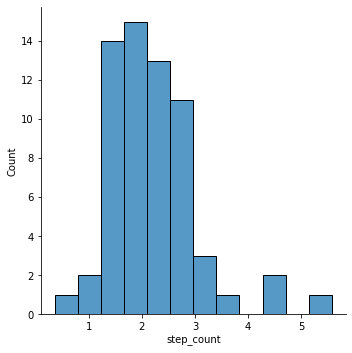

In [94]:
sns.displot(df1["Rain [mm/hr]"], kde=False)
plt.xlabel("step_count")
plt.show()

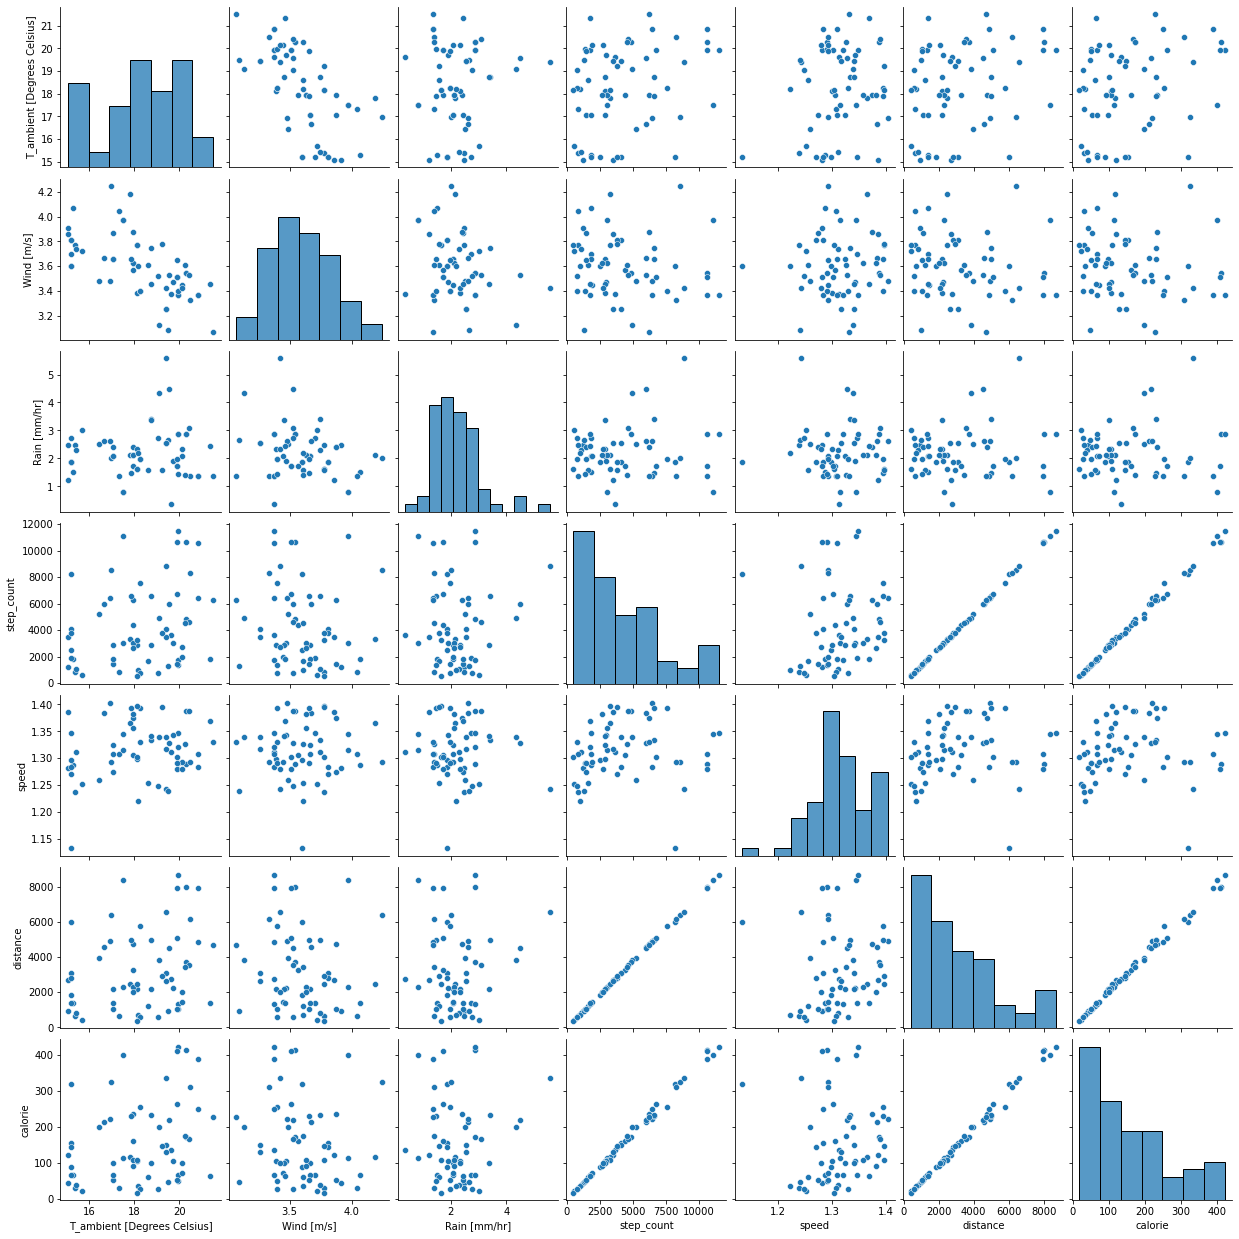

In [95]:
sns.pairplot(df1)
plt.show() #using Matplotlib to check correlation of different variables and check my personal predictions

The only clear correlation we can see here is the step count and calories as well as distance and calories. There is a relation between wind and temperature which shows that the more wind usually means lower temperature. There is also a slight sign of relation between wind and steps count which shows that the less wind the more steps.

In [96]:
num = df1[["T_ambient [Degrees Celsius]", "Wind [m/s]", "Rain [mm/hr]", "step_count", 'speed', 'distance', 'calorie']]
num.corr()

,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie
T_ambient [Degrees Celsius],1.000000,-0.612429,0.075455,0.276403,0.177711,0.278906,0.280780
Wind [m/s],-0.612429,1.000000,-0.249121,-0.131896,0.047462,-0.133223,-0.134772
Rain [mm/hr],0.075455,-0.249121,1.000000,0.056874,-0.040252,0.058634,0.061989
step_count,0.276403,-0.131896,0.056874,1.000000,0.113265,0.999843,0.997652
speed,0.177711,0.047462,-0.040252,0.113265,1.000000,0.127005,0.072094
distance,0.278906,-0.133223,0.058634,0.999843,0.127005,1.000000,0.996933
calorie,0.280780,-0.134772,0.061989,0.997652,0.072094,0.996933,1.000000


As we can see in reality the correlation is mostly present for obvious variables step count and calories as well as distance and calories. The correlation that I thouight was slight turned out to be reverse (below zero) and still very low. The best but negligible correlation of ~0.28 for distance and temperature as well as 0.28 for calories and temperature. 

## Part 3: Predictive model building

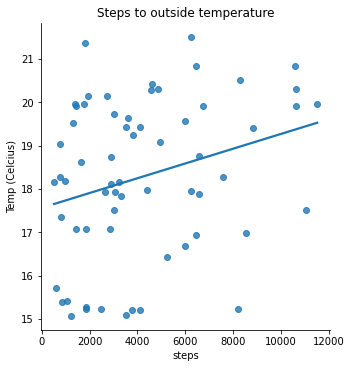

In [97]:
sns.lmplot(x='step_count', y='T_ambient [Degrees Celsius]', data=df1, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Steps to outside temperature')
plt.xlabel('steps')
plt.ylabel('Temp (Celcius)')
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df1[["T_ambient [Degrees Celsius]", "Wind [m/s]", "Rain [mm/hr]"]] 
y = df1["step_count"]
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = -8967.906 + 518.309X


In [99]:
df1['step_count_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df1.head(10)

,Date,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie,step_count_p
0,2022-04-26 00:00:00+00:00,15.704,3.721333,3.021,586,1.251768,437.20,21.619999,3147.951503
1,2022-04-27 00:00:00+00:00,15.285,4.070333,1.500,1859,1.286935,1398.28,66.399994,2979.902696
2,2022-04-28 00:00:00+00:00,15.227,3.701042,2.720,1865,1.346884,1410.03,67.250000,2827.976551
3,2022-04-29 00:00:00+00:00,15.070,3.911250,2.488,1210,1.282183,908.36,43.730000,2898.958055
4,2022-04-30 00:00:00+00:00,15.396,3.773458,2.479,860,1.237881,642.81,31.800000,2939.151494
5,2022-05-01 00:00:00+00:00,15.423,3.743375,2.295,1055,1.311672,798.36,38.730000,2892.364068
6,2022-05-02 00:00:00+00:00,15.221,3.602000,1.870,8201,1.132793,6003.93,319.030000,2580.930759
7,2022-05-02 00:00:00+00:00,15.221,3.602000,1.870,2483,1.297439,1861.83,89.940000,2580.930759
8,2022-05-04 00:00:00+00:00,15.087,3.858750,1.233,3510,1.385795,2672.32,120.930000,2634.105094
9,2022-05-05 00:00:00+00:00,15.209,3.812208,1.857,4102,1.283276,3070.79,154.379990,2766.367473


In [100]:
df1["resid"] = df1["step_count"] - df1["step_count_p"]#get the residuals by subtracting the prediction from the actual views
df1.head(10)

,Date,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie,step_count_p,resid
0,2022-04-26 00:00:00+00:00,15.704,3.721333,3.021,586,1.251768,437.20,21.619999,3147.951503,-2561.951503
1,2022-04-27 00:00:00+00:00,15.285,4.070333,1.500,1859,1.286935,1398.28,66.399994,2979.902696,-1120.902696
2,2022-04-28 00:00:00+00:00,15.227,3.701042,2.720,1865,1.346884,1410.03,67.250000,2827.976551,-962.976551
3,2022-04-29 00:00:00+00:00,15.070,3.911250,2.488,1210,1.282183,908.36,43.730000,2898.958055,-1688.958055
4,2022-04-30 00:00:00+00:00,15.396,3.773458,2.479,860,1.237881,642.81,31.800000,2939.151494,-2079.151494
5,2022-05-01 00:00:00+00:00,15.423,3.743375,2.295,1055,1.311672,798.36,38.730000,2892.364068,-1837.364068
6,2022-05-02 00:00:00+00:00,15.221,3.602000,1.870,8201,1.132793,6003.93,319.030000,2580.930759,5620.069241
7,2022-05-02 00:00:00+00:00,15.221,3.602000,1.870,2483,1.297439,1861.83,89.940000,2580.930759,-97.930759
8,2022-05-04 00:00:00+00:00,15.087,3.858750,1.233,3510,1.385795,2672.32,120.930000,2634.105094,875.894906
9,2022-05-05 00:00:00+00:00,15.209,3.812208,1.857,4102,1.283276,3070.79,154.379990,2766.367473,1335.632527


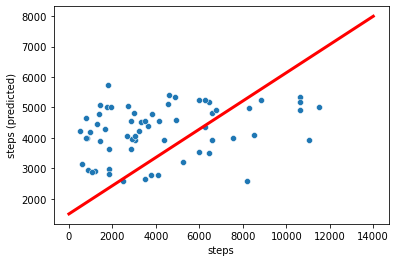

In [101]:
sns.scatterplot(x='step_count',y='step_count_p',data=df1)
plt.plot([0, 14000], [1500, 8000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('steps')
plt.ylabel('steps (predicted)')
plt.show()

In [102]:
r2_score(df1['step_count'], df1['step_count_p']) #this gives the model fit (R2) for the Y and predicted Y

0.08113269352168129

The R^2 is ~0.08, which means 8% of the variation in views is explained by the model. That's not really good...

In [103]:
math.sqrt(mean_squared_error(df1['step_count'], df1['step_count_p'])) #this gives the model fit (R2) for the Y and predicted Y

2826.6143034987895

The RMSE is 2826. Which means that we are typically about 2826 off in our predicted steps.

I created knn algorythm to predict step count but there was an error of the outcome which was 0.0. It happened because I used continous variables for step_count. I need to transform that to discrete values and continue with knn prediction. As follows:

In [104]:
df1 = df1.astype({'T_ambient [Degrees Celsius]':'int'})
df1 = df1.astype({'Wind [m/s]':'int'})
df1 = df1.astype({'Rain [mm/hr]':'int'})

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Date                         63 non-null     datetime64[ns, UTC]
 1   T_ambient [Degrees Celsius]  63 non-null     int32              
 2   Wind [m/s]                   63 non-null     int32              
 3   Rain [mm/hr]                 63 non-null     int32              
 4   step_count                   63 non-null     int64              
 5   speed                        63 non-null     float64            
 6   distance                     63 non-null     float64            
 7   calorie                      63 non-null     float64            
 8   step_count_p                 63 non-null     float64            
 9   resid                        63 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(5), int32(3), int

In [106]:
df1['step_count'].round(0)
df1['T_ambient [Degrees Celsius]'].round(0)
df1['Wind [m/s]'].round(0)
df1['Rain [mm/hr]'].round(0)
df1

,Date,T_ambient [Degrees Celsius],Wind [m/s],Rain [mm/hr],step_count,speed,distance,calorie,step_count_p,resid
0,2022-04-26 00:00:00+00:00,15,3,3,586,1.251768,437.2000,21.619999,3147.951503,-2561.951503
1,2022-04-27 00:00:00+00:00,15,4,1,1859,1.286935,1398.2800,66.399994,2979.902696,-1120.902696
2,2022-04-28 00:00:00+00:00,15,3,2,1865,1.346884,1410.0300,67.250000,2827.976551,-962.976551
3,2022-04-29 00:00:00+00:00,15,3,2,1210,1.282183,908.3600,43.730000,2898.958055,-1688.958055
4,2022-04-30 00:00:00+00:00,15,3,2,860,1.237881,642.8100,31.800000,2939.151494,-2079.151494
...,...,...,...,...,...,...,...,...,...,...
58,2022-06-23 00:00:00+00:00,19,3,1,1422,1.291845,1064.5500,51.880000,5080.956213,-3658.956213
59,2022-06-24 00:00:00+00:00,20,3,1,4558,1.326551,3446.6800,173.390000,5123.441866,-565.441866
60,2022-06-25 00:00:00+00:00,20,3,2,2711,1.279821,2040.7000,100.950000,5046.978747,-2335.978747
61,2022-06-26 00:00:00+00:00,21,3,1,6244,1.330677,4693.0195,227.199980,5256.043369,987.956631


In [107]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df1[["T_ambient [Degrees Celsius]", "Wind [m/s]", "Rain [mm/hr]"]] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df1['step_count'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [108]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNeighborsClassifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.0

Even after fixing the values to full numbers the Knn score is still 0.0 which suggest there is a different error that I'm unaware of or this is an actual result. 

In [109]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         513       0.00      0.00      0.00       0.0
         586       0.00      0.00      0.00       0.0
         773       0.00      0.00      0.00       1.0
         860       0.00      0.00      0.00       0.0
         972       0.00      0.00      0.00       0.0
        1210       0.00      0.00      0.00       1.0
        1285       0.00      0.00      0.00       0.0
        1394       0.00      0.00      0.00       0.0
        1643       0.00      0.00      0.00       1.0
        1764       0.00      0.00      0.00       1.0
        1798       0.00      0.00      0.00       0.0
        1836       0.00      0.00      0.00       1.0
        1865       0.00      0.00      0.00       1.0
        2657       0.00      0.00      0.00       1.0
        2876       0.00      0.00      0.00       1.0
        2902       0.00      0.00      0.00       1.0
        2999       0.00      0.00      0.00       1.0
        3035       0.00    

C:\Users\maksz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maksz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maksz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maksz\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [110]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.0

As can be seen here the weighted average precision is 0% as well as the recall. These scores cannot be considered as good.

# Part 4: Results

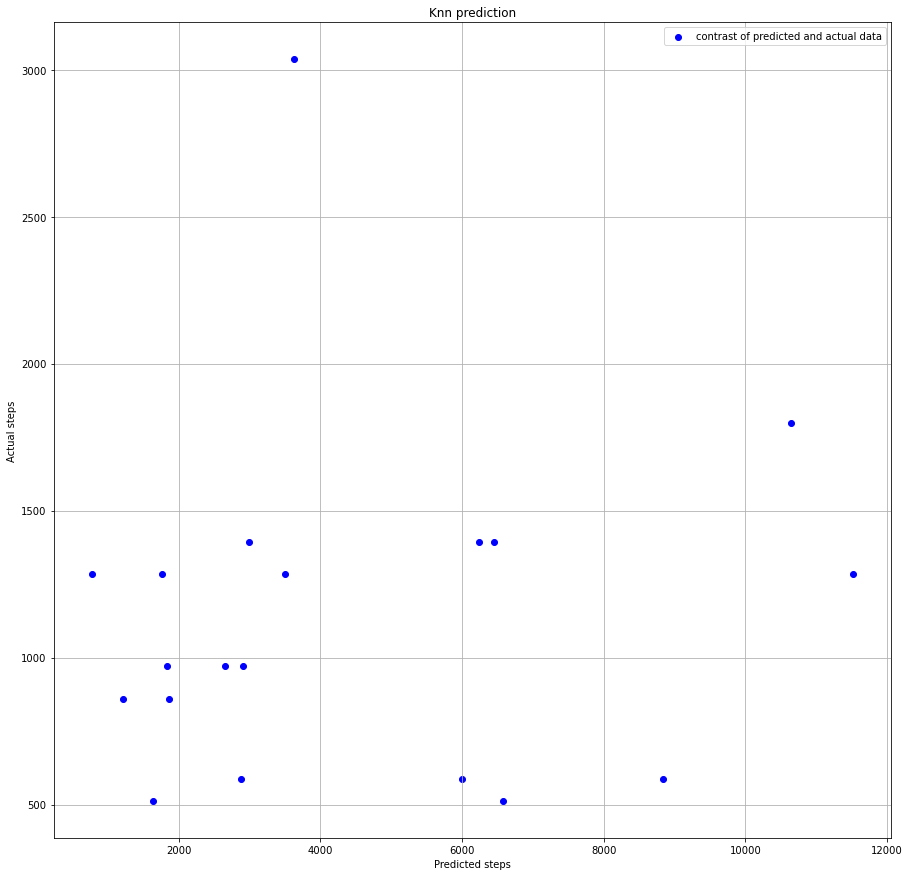

In [111]:
plt.figure(figsize= (15, 15))
plt.scatter(y_test, y_pred, color = 'blue', label='contrast of predicted and actual data')
plt.legend()
plt.grid()
plt.title('Knn prediction')
plt.xlabel('Predicted steps')
plt.ylabel('Actual steps')
plt.show()

We can see that the predicted steps and actual steps are not in line at all

In [112]:
mean_squared_error(y_test,y_pred)

20498894.315789472

MSE 20498894 is really high which means the model isn't accurate

How to calculate calories based on steps? As the correlation between steps and calories burned is 99%:

Predicted Steps * 0.4 (calories) = Burned calories

Summarizing the outcomes: The prediction model is no the best. It's prediction accuracy is very low and probably requires more personal steps data (didn't had more due to phone hard reset in April). A reason for it being not accurate is also the simple issue of too little correlation between variables which then leads it to low prediction precision and there is lack of variable that can avtually help predicting. Most likely the number of steps that I make throughout the day is not based on weather but more on duties that I have throughout the day, week, month. To help me with predicting calories burned I would rather base the outcomes on more variables shuch as hearth beat rate and actual body composition and more accurate calories burn furing exercises. 

# References:

Meteorological data. (n.d.). TU Delft. Retrieved June 28, 2022, from https://www.tudelft.nl/en/ewi/over-de-faculteit/afdelingen/electrical-sustainable-energy/photovoltaic-materials-and-devices/dutch-pv-portal/meteorological-data